# Сборный проект 1

## Описание проекта  
Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Получены данные до 2016 года, планируется кампания на 2017-й. Нужно отработать принцип работы с данными.  

*В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».*    

#### Какие шаги необходимы:
[Шаг 1. Открыть файлы и изучить общую информацию](#Step1)    
[Шаг 2. Подготовка данных](#Step2)  
[Шаг 3. Проведение исследовательского анализа данных](#Step3)  
[Шаг 4. Составление портрета пользователей каждого региона](#Step4)  
[Шаг 5. Проверка гипотез](#Step5)  
[Шаг 6. Общий вывод](#Step6)  

### Шаг 1. Изучение общей информации о файле <a name="Step1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Описание данных
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Неверные типы данных в столбцах Year_of_Release, User_Score

In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### Шаг 2. Подготовьте данные <a name="Step2"></a>

#### Этапы шага 2:
1. Заменить названия столбцов (привести к нижнему регистру);
2. Преобраззовать данные в нужные типы;
3. Обработать пропуски при необходимости, описать причины их возникновения;
5. Проанализировать аббревиатуру 'tbd' в столбцах с рейтингом;
6. Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

Займемся вопросами по списку, начав с названий столбцов. Можно было бы их переименовать через set_axis, но пришлось бы прописывать все новые названия вручную. Вместо этого используем инструмент str.lower

In [6]:
data.columns = map(str.lower, data.columns)

In [7]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Проверим на наличие дубликатов

In [8]:
data.duplicated().sum()

0

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьюера</h1>

Отлично, что ты не пропустил этот важный момент
</div>

Дубликатов нет.  
Как было указано в шаге 1, есть неверные типы данных в столбцах Year_of_Release, User_Score.   
В Year_of_Release у нас информация по годам выпуска игры, здесь больше подойдет формат 'int' (не datetime, так как только год).  
User_Score - оценка пользователей, сейчас тип 'object'. Есть дробные значения, установим float.  

In [9]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
1.3       2
0.5       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Найдено значение tbd, которое означает, что оценка ещё не выставлена

In [11]:
data['user_score'] = data['user_score'].replace("tbd","NaN")

In [12]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [13]:
data['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64

In [14]:
data['user_score'].isna().sum()

9125

Для того, чтобы перевести дробные значения по году выпуска в целочисленные необходимо сначала устранить пропуски. Поставим вместо них медиану по самому столбцу, так как других разумных вариантов не имеется.

In [15]:
data.loc[data['year_of_release'].isna(), 'year_of_release'] = data['year_of_release'].median()

In [16]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Пропуски в столбцах name и genre (их два в обоих случаях) носят уникальный характер. Они могли возникнуть из-за невнимательности при внесении данных.
Название пропущенных игр угадать невозможно, лучше было бы постараться уточнить у отдела, предоставившего информацию. На качество дальнейшего анализа и общие выводы данные пропуски повлиять не должны. 
Пропуски в жанре заменим на самое популярное значение самого столбца, это не вызовет искажений.

In [18]:
data['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [19]:
data['genre'] = data['genre'].fillna('Action')

 Важнейшие пропуски заключены в столбцах с оценками критиков, пользователей и возрастным рейтингом. Их от 40 до 60%.  
 Оценки пользователей могут иметь корреляцию с оценками критиков, но прямой взаимосвязи нет: нередко популярные в народе игры получают не самые высокие баллы от критиков. С остальными данными - дата выхода, жанр, продажи - оценки

In [20]:
data['critic_score'].corr(data['user_score'])

0.5808778320767236

Корреляция между оценками пользователей и критиков средняя. Проверим вариант с продажами, создав столбец с суммой по всем регионам.

In [21]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [22]:
data['user_score'].corr(data['total_sales'])

0.08817911987579136

Корреляция очень слабая. Оставим пропуски в столбцах с оценками: игры могут не оцениваться вовсе, являясь небольшими проектами и оставаясь без внимания. Для понимания, как оценки будут влиять на продажи нам достаточно данных.

In [23]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [24]:
data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [25]:
data['rating'].isna().sum()

6766

Пропуски обусловлены тем, что организация, выставляющая рейтинги по возрасту, работает на территории США и Канады, куда попадают не все игры. Мы не можем выставлять для них рейтинг, так как методика категоризации по допустимому контенту для возрастов отличается по странам.

### Вывод по шагу 2

### Шаг 3. Проведение исследовательского анализа данных <a name="Step3"></a>

#### Этапы шага 3
1. Посмотреть, сколько игр выпускалось в разные годы.   
2. Проверить, как менялись продажи по платформам: обнаружить платформу с наибольшими суммарными продажами, построить распределение по годам, найти характерный срок появления новых и исчезновения старых платформ?  
3. Сделать выборку данных за соответствующий актуальный период. 
4. Проанализировать, какие платформы лидируют по продажам, растут или падают. Выбрать несколько потенциально прибыльных платформ. Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.  
5. Посчитать, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.  Соотнести выводы с продажами игр на других платформах.  
6. Посмотреть на общее распределение игр по жанрам: какие самые прибыльные, выделяются ли жанры с высокими и низкими продажами.  

Построим гистограмму распределения по годам выпуска игр

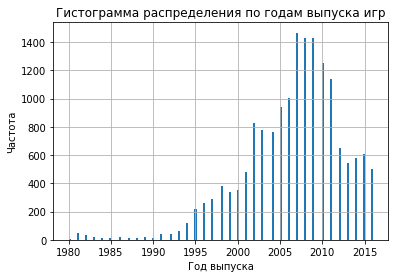

In [26]:
data['year_of_release'].hist(bins=150)
plt.xlabel('Год выпуска')
plt.ylabel('Частота')
plt.title('Гистограмма распределения по годам выпуска игр');

In [27]:
data_actual_year = data.query ('year_of_release > 1993')
display(data_actual_year.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80


In [28]:
platform_by_year = data_actual_year.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
platform_by_year.sample(10)

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,N64,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
2000,NaN,NaN,NaN,5.99,NaN,19.76,0.07,NaN,NaN,33.97,...,NaN,NaN,NaN,NaN,0.68,NaN,NaN,NaN,0.99,NaN
2002,NaN,NaN,NaN,0.29,NaN,NaN,74.16,51.81,NaN,0.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.01,NaN
2009,NaN,NaN,NaN,NaN,119.54,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,206.97,NaN,120.29,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,6.37,NaN,NaN,NaN,39.50,...,6.77,NaN,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,NaN,NaN,NaN,NaN,85.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,127.95,NaN,170.03,NaN,NaN
2008,NaN,NaN,NaN,0.04,145.31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,171.32,NaN,135.26,0.18,NaN
2003,NaN,NaN,NaN,NaN,NaN,NaN,56.67,50.61,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.04,NaN
2014,NaN,NaN,43.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.75,22.03,34.74,NaN,54.07
2004,NaN,NaN,NaN,NaN,17.27,NaN,77.91,28.82,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.42,NaN


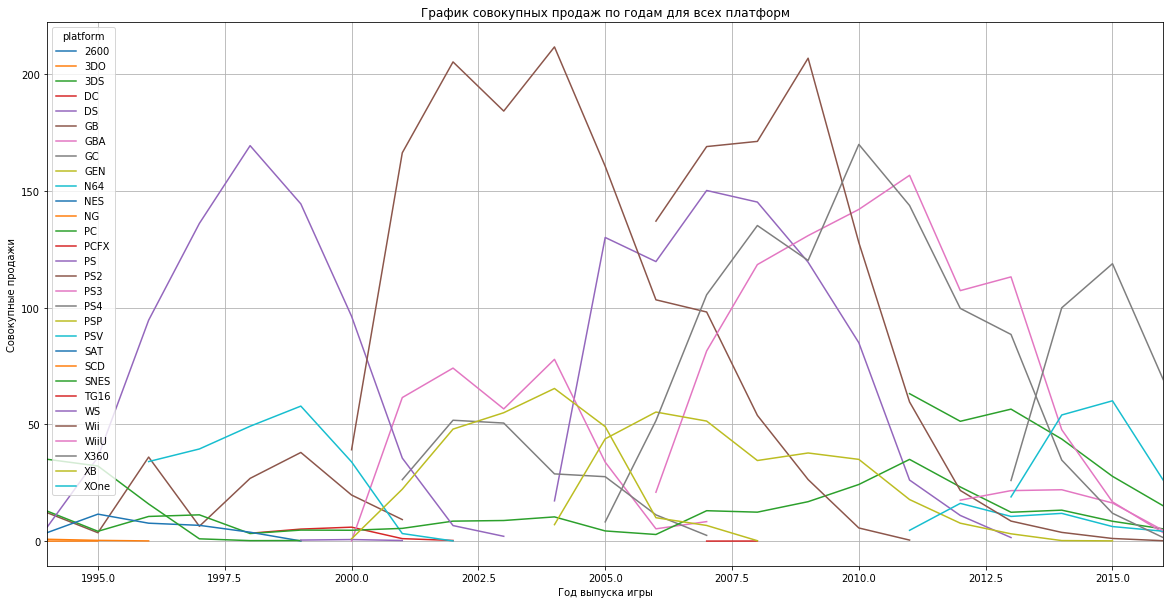

In [29]:
platform_by_year.plot(grid=True, figsize=(20, 10));
plt.xlabel('Год выпуска игры')
plt.ylabel('Совокупные продажи')
plt.title('График совокупных продаж по годам для всех платформ');

К сожалению, единый график со всеми платформами выглядит нагроможденным и сделать по нему выводы сложно. Поделим платформы на три равные части и нарисуем график

In [30]:
data_actual_year['platform'].unique()

array(['Wii', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', '3DS',
       'N64', 'PS', 'SNES', 'XB', 'PC', 'PSP', 'XOne', 'WiiU', 'GC',
       '2600', 'DC', 'PSV', 'SAT', 'GEN', 'WS', 'NG', 'SCD', 'TG16',
       'NES', '3DO', 'PCFX'], dtype=object)

In [31]:
platform1 = data_actual_year.query('platform in ("2600", "3DO", "3DS", "DC", "DS", "GB", "GBA", "GC", "GEN", "N64")')

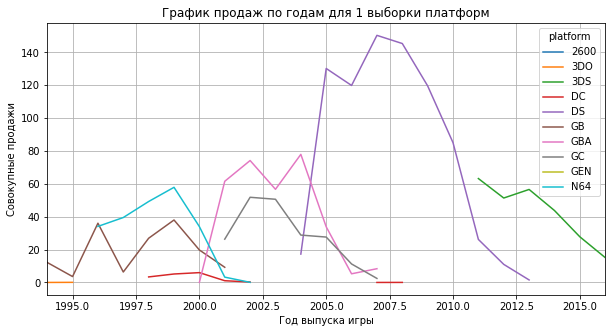

In [32]:
platform1_by_year = (platform1
                     .pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
                     .plot(grid=True, figsize=(10, 5))
                    );
plt.xlabel('Год выпуска игры')
plt.ylabel('Совокупные продажи')
plt.title('График продаж по годам для 1 выборки платформ');

Некоторые платформы из первой выборки были малопопулярными с околонулевой тиражностью игр (3DO, DC). Чаще наблюдается один из следующий вариант, когда спустя 2 года после выпуска первых игр платформа набирает популярность большими темпами и сохраняет пик в течение 3 лет, затем спад (DS,GBA,GCG,GB). В последние годы продаются только игры на 3DS.

Сделаем вторую выборку

In [33]:
platform2 = data_actual_year.query('platform in ("NES", "NG", "PC", "PCFX", "PS", "PS2", "PS3", "PS4", "PSP", "PSV")')

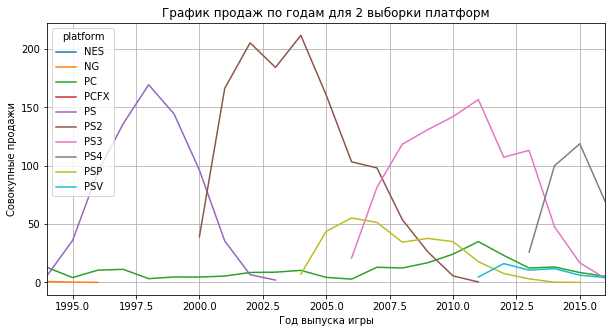

In [34]:
platform2_by_year = (platform2
                     .pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
                     .plot(grid=True, figsize=(10, 5))
                    );
plt.xlabel('Год выпуска игры')
plt.ylabel('Совокупные продажи')
plt.title('График продаж по годам для 2 выборки платформ');

С выходом каждой новой версии приставки Playstation старая сразу же резко теряет в продажах. Остальные платформы не имеют серьезных колебаний и отличаются стабильностью.

In [35]:
platform3 = data_actual_year.query('platform in ("SAT", "SCD", "SNES", "TG16", "WS", "Wii", "WiiU", "X360", "XB", "XOne")')

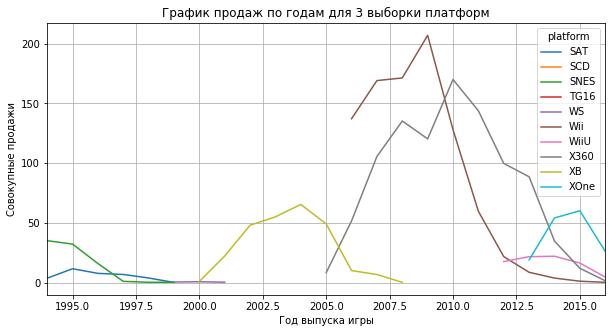

In [36]:
platform3_by_year = (platform3
                     .pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
                     .plot(grid=True, figsize=(10, 5))
                    );
plt.xlabel('Год выпуска игры')
plt.ylabel('Совокупные продажи')
plt.title('График продаж по годам для 3 выборки платформ');

С приставками XBox такая же история, как и с Playstation - выход новой версии провоцирует снижение продаж старой. Однако, здесь есть более резкий скачок для X360, в то время как игры на "соседние" версии (XB, XOne) гораздо менее продаваемы.
Приставка Wii показала одни из наибольших продаж в конце первой декады 21 века, но стремительно утратила популярность.

Итак, необходимо выбрать наиболее популярные платформы. Остановимся на следующих критериях: 
1. Требуется хотя бы раз превысить барьер в 100 млн. проданных копий игр. Выходит, что отбираем как нужные: Wii, X360, PS, PS2, PS3, PS4, DS. 
2. Оставим XOne и 3DS, которые, судя по графикам, имеет ещё имеет некоторый потенциал.

In [37]:
platforms_top = data_actual_year.query('platform in ("PS", "PS2", "PS3", "PS4", "DS", "Wii", "X360", "XOne", "3DS")')

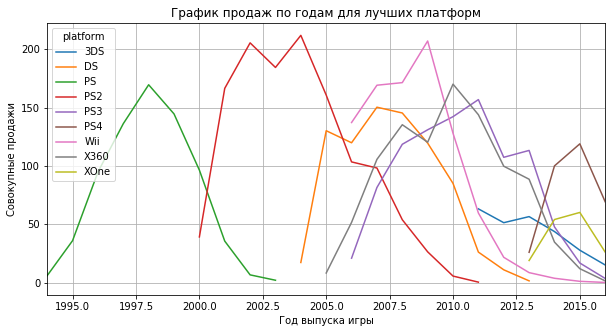

In [38]:
platforms_top_by_year = (platforms_top
                     .pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
                     .plot(grid=True, figsize=(10, 5))
                    );
plt.xlabel('Год выпуска игры')
plt.ylabel('Совокупные продажи')
plt.title('График продаж по годам для лучших платформ');

Для семи из девяти выбранных платформ расцвет приходится на период 2005 года и далее. В то же время после 2010 года все, кроме PS4 и XOne, сильно на спаде, и к текущему моменту их продажи почти нулевые. Можно считать, что именно на PS4 и XOne необходимо сделать упор. Продажи 3DS падают, но ещё на уровне 20 млн, их нельзя сбрасывать со счетов. Оставим данные с 2013 года, когда вышли PS4 и XOne.

In [39]:
data_last_years = data.query ('year_of_release >= 2013')
data_last_years.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [40]:
data_act = data_last_years.query('platform in ("PS4", "XOne", "3DS")')
data_act.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


Выполним задачу по подсчёту продаж каждой игры и разбивкой по платформам

In [41]:
platforms_with_potential = data_act.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
platforms_with_potential                          

platform,3DS,PS4,XOne
name,,,
Beyblade Burst,0.03,NaN,NaN
Fire Emblem Fates,1.67,NaN,NaN
Frozen: Olaf's Quest,0.59,NaN,NaN
Haikyu!! Cross Team Match!,0.04,NaN,NaN
12-Sai. Honto no Kimochi,0.07,NaN,NaN
...,...,...,...
Zombie Army Trilogy,NaN,0.20,0.11
Zoo Tycoon (2013),NaN,NaN,0.36
Zumba Fitness: World Party,NaN,NaN,0.24


(0, 15)

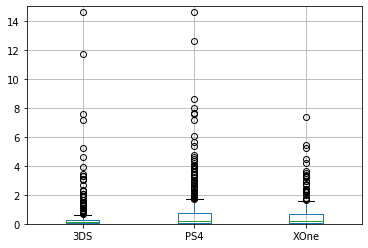

In [42]:
platforms_with_potential.boxplot()
plt.ylim(0, 15)

Данный "график с усами" отражает ряд выбросов игр для PS4 и 3DS выше 8 млн., но в целом не совсем показателен, можно лишь отметить, что общие продажи 3DS меньше, их выход в "тройку лидеров" за последние годы стал возможен благодаря единичным успешным проектам. 
Уменьшим диапазон.

(0, 8)

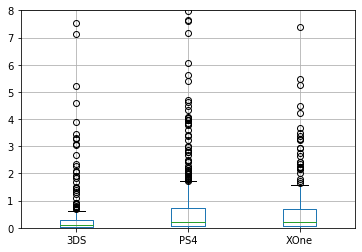

In [43]:
platforms_with_potential.boxplot()
plt.ylim(0,8)

Новая диаграмма размаха отразила закономерности:
1. Медиана и третий квартиль у PS4 и XOne очевидно больше, чем у 3DS, значит игры в среднем лучше продаются
2. Выбросы для PS4 и XOne начинаются после полутора миллионов копий, у 3DS рядом с 600-700 тысяч.

In [44]:
platforms_with_potential.describe()

platform,3DS,PS4,XOne
count,303.000000,392.000000,247.000000
mean,0.472772,0.801378,0.645020
std,1.381347,1.609456,1.036139
min,0.010000,0.010000,0.010000
25%,0.040000,0.060000,0.060000
50%,0.090000,0.200000,0.220000
75%,0.280000,0.730000,0.685000
max,14.600000,14.630000,7.390000


Средний показатель продаж для 3DS так же самый низкий. Лидером по показателю является PS4.

Проанализируем влияние отзывов на продажи игр для PS4 

In [45]:
data_ps4 = data_actual_year.query('platform in "PS4"')

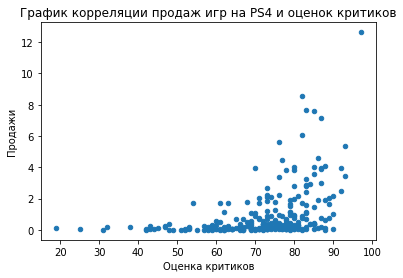

In [46]:
data_ps4.plot(x='critic_score', y='total_sales', kind='scatter');
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.title('График корреляции продаж игр на PS4 и оценок критиков');

Диаграмма рассеяния показывает четкую прямую взаимосвязь оценок критиков и продаж игр: 
1. Если игра получала от критика менее 50 баллов, то она почти не продавалась
2. С баллами от 50 до 70 наблюдается повышение продаж с редкими выбросами до 2 миллионов копий
3. Свыше 70 баллов - игры высокого уровня одобрения критиками - всё чаще игры расходятся миллиоными тиражами

In [47]:
data_ps4['total_sales'].corr(data_ps4['critic_score'])

0.406567902061781

Корреляция средняя, что связано со слабой взаимозависимостью продаж при оценках критиков меньше 50.

Обратимся к оценке пользователей

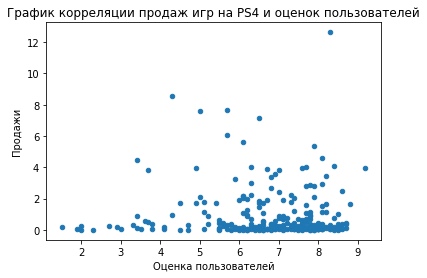

In [48]:
data_ps4.plot(x='user_score', y='total_sales', kind='scatter');
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.title('График корреляции продаж игр на PS4 и оценок пользователей');

Диаграмма выглядит более хаотичной: есть примеры с продажами по 4 миллиона и даже по 8 миллионов с оценкой 5 баллов и ниже. С оценкой выше 5 так же нет явных наблюдений - самые продаваемые игры получали и 5.5, и 6.5, и 8.5.

In [49]:
data_ps4['total_sales'].corr(data_ps4['user_score'])

-0.031957110204556424

За счёт выбивающихся значений с низкой оценкой корреляция вышла нулевой

Построим схожие диаграммы для других популярных платформ

In [50]:
data_other_platforms = platforms_top.query('platform not in "PS4"')

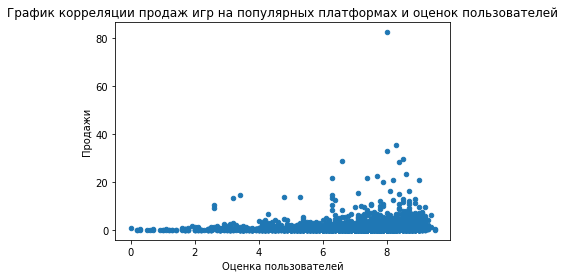

In [51]:
data_other_platforms.plot(x='user_score', y='total_sales', kind='scatter');
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.title('График корреляции продаж игр на популярных платформах и оценок пользователей');

Взаимосвязь с оценкой пользователей более явная и упорядоченная: при увеличении оценки в общем растёт и продаваемость. Оценим корреляцию.

In [52]:
data_other_platforms['total_sales'].corr(data_other_platforms['user_score'])

0.11252309490691614

Несмотря на предыдущее наблюдение, корреляция очень слабая - снова низкие оценки не влияют на продажи. Впрочем, разные оценки 7 выше тоже показывают отсутствие зависимости.

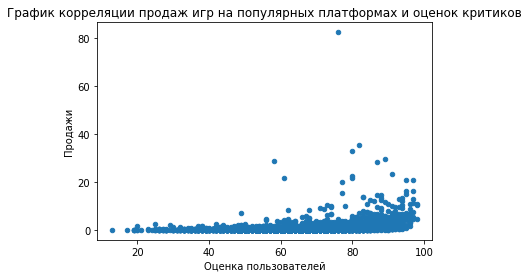

In [53]:
data_other_platforms.plot(x='critic_score', y='total_sales', kind='scatter');
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.title('График корреляции продаж игр на популярных платформах и оценок критиков');

Получая оценку около 60 от критиков, игры уже могли продаваться многомилионными экземплярами. Свыше 80 заметен скачок в продажах.

In [54]:
data_other_platforms['total_sales'].corr(data_other_platforms['critic_score'])

0.2814614201425117

Тем не менее, корреляция снова слабая, так как оценки до 60 влияния почти не оказывают.

Изучим жанры игр, суммарную выручку от продаж, среднее и медиану.

In [55]:
top_genres_sum = platforms_top.pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['sum'])
top_genres_sum

,sum
,total_sales
genre,
Action,1359.64
Adventure,157.08
Fighting,305.91
Misc,662.86
Platform,383.75
Puzzle,122.86
Racing,531.76
Role-Playing,578.98


Топ три жанра по совокупной выручке от продаж: Action, Sports, Shooter

In [56]:
top_genres = platforms_top.pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['mean', 'median'])
top_genres

,mean,median
,total_sales,total_sales
genre,,
Action,0.617737,0.230
Adventure,0.199340,0.070
Fighting,0.592849,0.255
Misc,0.504460,0.170
Platform,0.907210,0.290
Puzzle,0.330269,0.110
Racing,0.693299,0.240
Role-Playing,0.668568,0.220


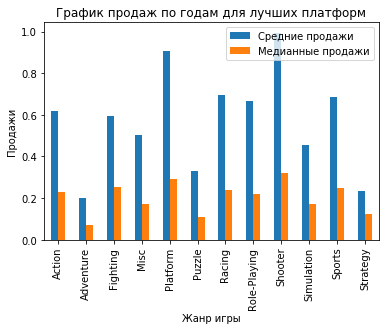

In [57]:
ax = top_genres.plot(kind='bar');
plt.xlabel('Жанр игры')
plt.ylabel('Продажи')
plt.title('График продаж по годам для лучших платформ');
ax.legend(["Средние продажи", "Медианные продажи"],
         title = "");

### Вывод по шагу 3

В ходе исследовательского анализа были получены результаты:
1. Лучше всего продаются игры на платформах PS, PS2, PS3, PS4, DS, Wii, X360, XOne, 3DS
2. Актуальные платформы, на которые стоит обратить внимание: PS4, XOne, 3DS
3. Наиболее прибыльными являются жанры: Shooter, Platform. Наименее прибыльные: Adventure, Puzzle, Strategy

### Шаг 4. Составление портретов пользователей по регионам <a name="Step4"></a>

Определить для пользователя каждого региона (NA, EU, JP):  
1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.
2. Самые популярные жанры (топ-5).  
3. Влияние рейтинга ESRB на продажи в отдельном регионе?

Построим сводные таблицы по платформам, которые используются в каждом регионе

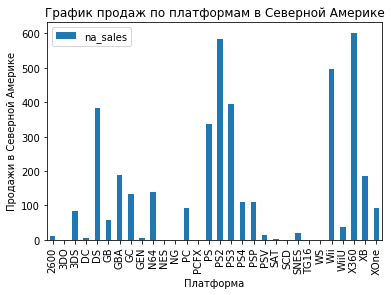

In [58]:
na_platform = data_actual_year.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
na_platform.plot(kind='bar')
plt.xlabel('Платформа')
plt.ylabel('Продажи в Северной Америке')
plt.title('График продаж по платформам в Северной Америке');

В северной Америке топ 5 платформ c 1994 года: DS, PS2, PS3, X360, Wii

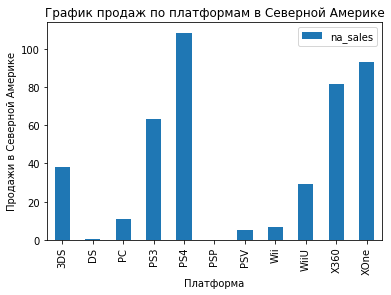

In [59]:
na_platform_now = data_last_years.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
na_platform_now.plot(kind='bar')
plt.xlabel('Платформа')
plt.ylabel('Продажи в Северной Америке')
plt.title('График продаж по платформам в Северной Америке');

А с 2013 - 3DS, PS3, PS4, X360, XOne

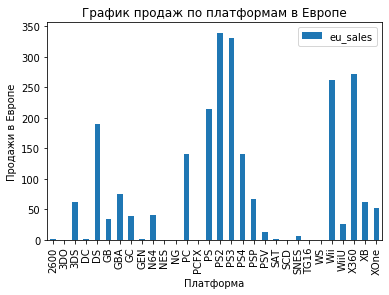

In [60]:
eu_platform = data_actual_year.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
eu_platform.plot(kind='bar')
plt.xlabel('Платформа')
plt.ylabel('Продажи в Европе')
plt.title('График продаж по платформам в Европе');

В Европе популярностью в целом пользуются X360, Wii, PS, PS2, PS3

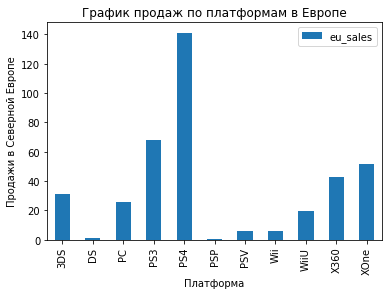

In [61]:
eu_platform_now = data_last_years.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
eu_platform_now.plot(kind='bar')
plt.xlabel('Платформа')
plt.ylabel('Продажи в Северной Европе')
plt.title('График продаж по платформам в Европе');

Оценивая более современные данные, в Европе востребованы PS3, PS4, X360, XOne, 3DS

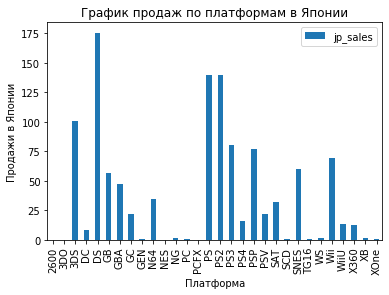

In [62]:
jp_platform = data_actual_year.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
jp_platform.plot(kind='bar')
plt.xlabel('Платформа')
plt.ylabel('Продажи в Японии')
plt.title('График продаж по платформам в Японии');


И, наконец, для Японии последних двух десятилетий таковыми являются 3DS, DS, PS, PS2, PS3

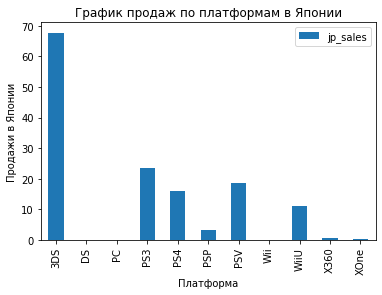

In [63]:
jp_platform_now = data_last_years.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
jp_platform_now.plot(kind='bar')
plt.xlabel('Платформа')
plt.ylabel('Продажи в Японии')
plt.title('График продаж по платформам в Японии');

С 2013 в Японии очень популярна 3DS, но игры продаются и на PS3, PS4, PSP, WiiU

Общий вывод по топ платформам таков: везде востребованы или были таковыми PS2, PS3. Последние 4 года самой популярной была PS4, но в остальных позициях есть различия: если в Европе и Америке предпочитают стационарные X360 и Xone, то для Японии более характеры мобильные небольшие гаджеты PSP, WiiU.

Оценим популярные жанры

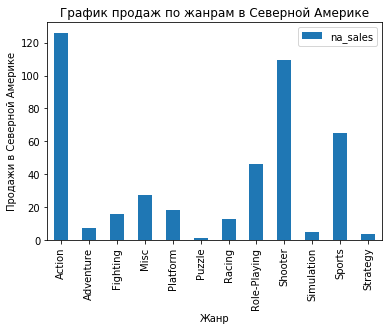

In [64]:
na_genres_now = data_last_years.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')
na_genres_now.plot(kind='bar')
plt.xlabel('Жанр')
plt.ylabel('Продажи в Северной Америке')
plt.title('График продаж по жанрам в Северной Америке');

Для Северной Америки популярны в Action, Shooter, Sports, Role-Playing, Misc.

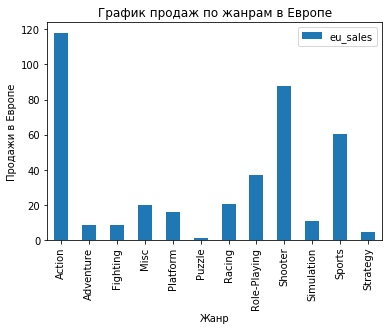

In [65]:
eu_genres_now = data_last_years.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')
eu_genres_now.plot(kind='bar')
plt.xlabel('Жанр')
plt.ylabel('Продажи в Европе')
plt.title('График продаж по жанрам в Европе');

Европейцы предпочитают игры жанров Action, Shooter, Sports, Role-Playing, Misc

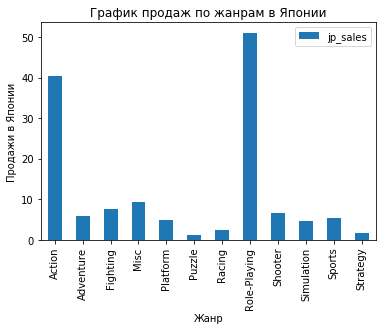

In [66]:
jp_genres_now = data_last_years.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')
jp_genres_now.plot(kind='bar')
plt.xlabel('Жанр')
plt.ylabel('Продажи в Японии')
plt.title('График продаж по жанрам в Японии');

В результате мы обнаруживаем полнейшее сходство топ пяти жанров между Европой и Северной Америкой. В Японии схожи по популярности жанры Role-Playing (однако он самый продаваемый), Action, Shooter, Misc, отличается лишь Fighting, попавший вместо спортивных игр.

У нас имеется возрастной рейтинг, который может влиять на продажи игр. Построим графики по регионам с делением на платформы.

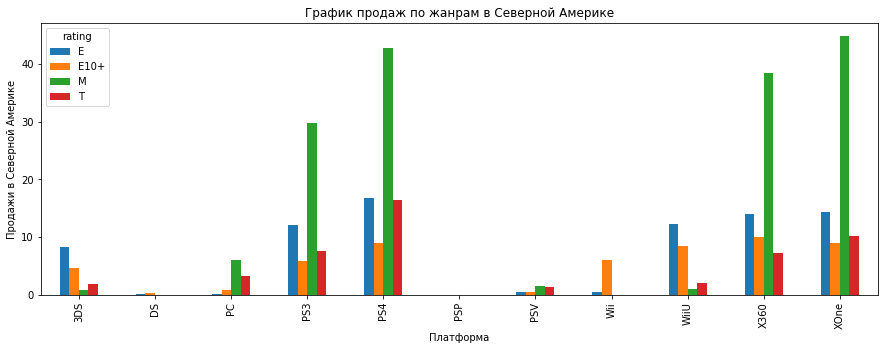

In [67]:
na_esrb = data_last_years.pivot_table(index = 'platform', columns = 'rating', values = 'na_sales', aggfunc = 'sum')
na_esrb.plot(kind='bar', figsize = (15,5))
plt.xlabel('Платформа')
plt.ylabel('Продажи в Северной Америке')
plt.title('График продаж по жанрам в Северной Америке');

Лучше всего в Северной Америке продаются игры с рейтингом 'M', что может быть обусловлено излишней жестокостью или наличием нецензурной лексики в играх последних лет, и соответствующим нежеланием компаний-производителей получить скандал из-за сомнительных эпизодов, то есть легче промаркировать сразу правильным образом, несмотря на недоступность таких игр некоторой части аудитории (младше 17 лет). На втором месте часто игры с рейтингом 'E', логично, так как он подразумевает доступность игры для всех возрастов.

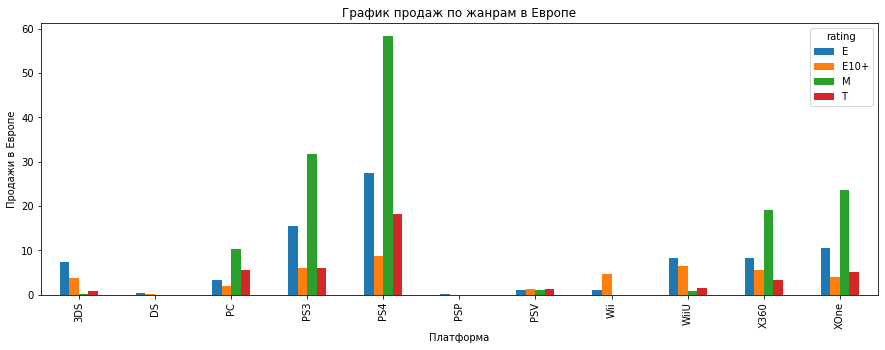

In [68]:
eu_esrb = data_last_years.pivot_table(index = 'platform', columns = 'rating', values = 'eu_sales', aggfunc = 'sum')
eu_esrb.plot(kind='bar', figsize = (15,5))
plt.xlabel('Платформа')
plt.ylabel('Продажи в Европе')
plt.title('График продаж по жанрам в Европе');

В Европе очень схожая картина с Северной Америкой. Предположу, что большинство игр производят американские Electronic Arts, Blizzard, Valve Corporation, Rockstar Games, а значит, что и рейтинги им сразу же выставляет американское агенство ESRB

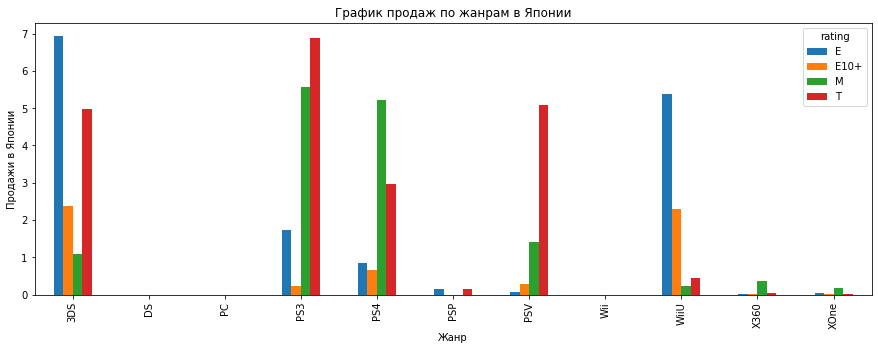

In [69]:
jp_esrb = data_last_years.pivot_table(index = 'platform', columns = 'rating', values = 'jp_sales', aggfunc = 'sum')
jp_esrb.plot(kind='bar', figsize = (15,5))
plt.xlabel('Жанр')
plt.ylabel('Продажи в Японии')
plt.title('График продаж по жанрам в Японии');


В Японии, с другой стороны, можно отметить популярность игр с рейтингом 'T', которые допустимы для подростков. На WiiU и 3DS игры чаще доступны всем, имея рейтинг 'E': это мобильные платформы, их нередко приобретают и детям из-за дешевизны по сравнению с полноценной стационарной приставкой.

### Выводы по шагу 4

### Шаг 5. Проверка гипотез <a name="Step5"></a>

#### Этапы шага 5  
Проверить гипотезы:   
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  

Внедрим выборки по платформам Xbox One и PC, удалив пропуски

In [70]:
data_actual_year = data_actual_year.dropna(subset = ['user_score'])

In [71]:
xbox_rating = data_actual_year.query ('platform in "XB"')

In [72]:
pc_rating = data_actual_year.query ('platform in "PC"')

Посчитаем дисперсии

In [73]:
#Дисперсия для "Xbox"
var_xbox_rating = np.var(xbox_rating['user_score'], ddof=1)
var_xbox_rating

2.2796749511391154

In [74]:
#Дисперсия для "PC"
var_pc_rating = np.var(pc_rating['user_score'], ddof=1)
var_pc_rating

2.3152760917889035

Мы должны проверить, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Значит, нулевая гипотеза - это равенство рейтингов двух платформ, а альтернативная - их неравенство.  
Используем метод 'st.ttest_ind', позволяющий сравнить средние значения двух генеральных совокупностей.

In [75]:
#Зададим достаточно высокий уровень значимости в 5%, в случае успеха попробуем уменьшить
alpha = .05
#И сравним с ним совокупности по платформам
#Дисперсии несильно отличаются, оставим equal_var = True
results = st.ttest_ind (
xbox_rating['user_score'],
pc_rating['user_score'],
equal_var = True)

print('p-значение: ', results.pvalue) 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  2.470143801445741e-07
Отвергаем нулевую гипотезу


Гипотеза не подтвердилась, а значит средние пользовательские рейтинги платформ Xbox One и PC отличаются

Сравним спортивные и экшн-игры

In [76]:
action_rating = data_actual_year.query ('genre in "Action"')

In [77]:
sports_rating = data_actual_year.query ('genre in "Sports"')

In [78]:
#Дисперсия для экшн игр
var_action_rating = np.var(action_rating['user_score'], ddof=1)
var_action_rating

2.031746898033205

In [79]:
#Дисперсия для спортивных игр
var_sports_rating = np.var(sports_rating['user_score'], ddof=1)
var_sports_rating

2.5965147189730033

Используем метод 'st.ttest_ind', позволяющий сравнить средние значения двух генеральных совокупностей. Нулевая гипотеза позволяет сделать вывод о равенстве совокупностей, альтернативная - о различиях.

In [80]:
#Зададим достаточно высокий уровень значимости в 5%, в случае успеха попробуем уменьшить
alpha2 = .05
#И сравним с ним совокупности по жанрам
#Дисперсии несильно отличаются, оставим equal_var = True
results2 = st.ttest_ind (
action_rating['user_score'],
sports_rating['user_score'],
equal_var = True)

print('p-значение: ', results2.pvalue) 

if (results2.pvalue < alpha2):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.10406951359049141
Не получилось отвергнуть нулевую гипотезу


Проверим с уровнем значимости 0.01

In [81]:
alpha3 = .01
#И сравним с ним совокупности по жанрам
#Дисперсии несильно отличаются, оставим equal_var = True
results3 = st.ttest_ind (
action_rating['user_score'],
sports_rating['user_score'],
equal_var = True)

print('p-значение: ', results3.pvalue) 

if (results3.pvalue < alpha3):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.10406951359049141
Не получилось отвергнуть нулевую гипотезу


### Выводы по шагу 5

Гипотеза о равенстве оценок для игр на платформах XBox и PC не подтвердилась.
Результат проверки гипотезы о равентсве оценок по жанрам action и sports не позволяет судить о значимом различии между играми жанра.

### Шаг 6. Общий вывод <a name="Step6"></a>